# Dimentionality Reduction on IRIS dataset

Le PCA (Principal Component Analysis) est une technique de réduction de dimensionnalité qui permet de transformer un jeu de données en un nouveau jeu de données avec moins de dimensions tout en conservant autant que possible la variance des données d'origine. Voici une explication graphique et étape par étape de ce qu'est le PCA et comment il fonctionne.

Étapes du PCA :
Standardisation des données -> Calcul de la matrice de covariance -> Calcul des vecteurs propres et des valeurs propres ->Sélection des composantes principales -> Transformation des données

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()

X = iris.data    # The inputs
y = iris.target  # The wanted output

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df = df.drop(['Label'], axis=1)

In [4]:
df.head()   # The first five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.tail()  # the last five elements

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
df.describe()   # statistical and general information about the data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


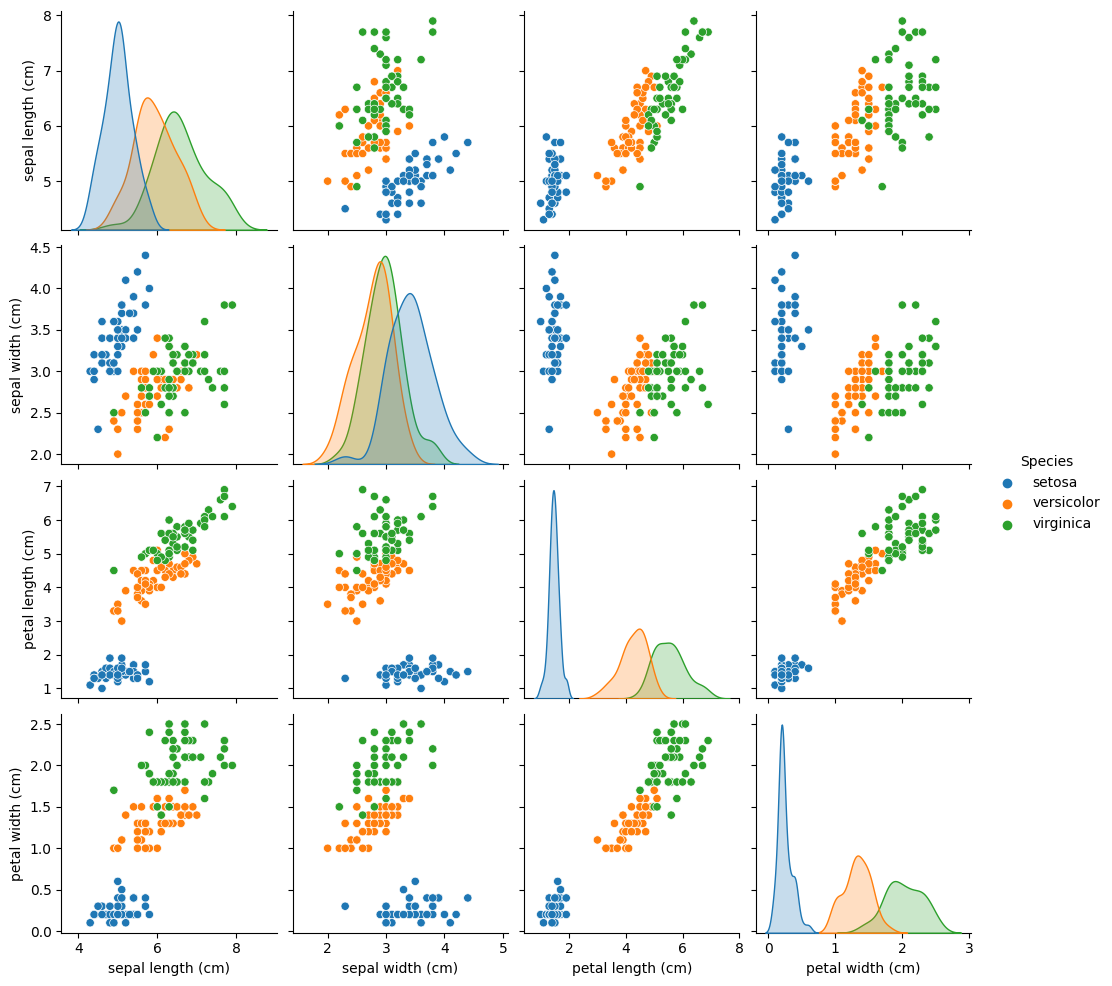

In [8]:
sns.pairplot(df,  hue='Species')

In [14]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

In [15]:
# Explained Variance Ratio of principle components
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

PC1: 0.9246187232017271
PC2: 0.053066483117067825
PC3: 0.017102609807929766
PC4: 0.005212183873275377


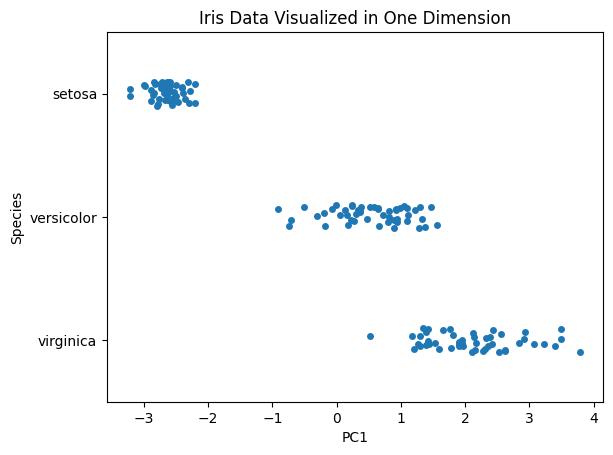

In [16]:
sns.stripplot(x="PC1", y="Species", data=df,jitter=True)
plt.title('Iris Data Visualized in One Dimension');

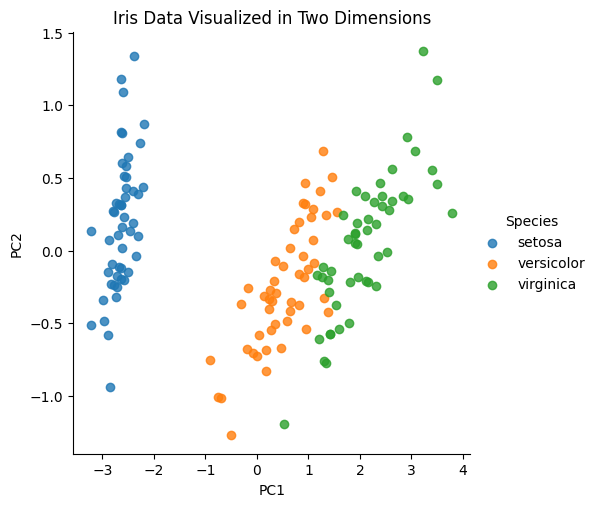

In [17]:
sns.lmplot(x='PC1',y='PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');

In [18]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

## Explication graphique :

### Données originales :

Le graphique de gauche montre les données originales du jeu de données Iris. Chaque point représente une fleur, et les couleurs indiquent les différentes espèces de fleurs.
Données après PCA :

Le graphique de droite montre les données après avoir appliqué le PCA. Les données sont projetées sur les deux premières composantes principales. Ces nouvelles dimensions sont des combinaisons linéaires des dimensions d'origine et capturent la majorité de la variance des données.


### Interprétation :

#### Réduction de dimensionnalité :

Le PCA permet de réduire le nombre de dimensions tout en conservant autant que possible la variance des données d'origine. Dans cet exemple, nous sommes passés de 4 dimensions à 2 dimensions.


#### Visualisation simplifiée :

En réduisant les dimensions, il devient plus facile de visualiser et d'interpréter les données, surtout lorsque les données d'origine ont de nombreuses dimensions.

#### Composantes principales :

Les nouvelles dimensions (composantes principales) sont des directions dans l'espace des données qui maximisent la variance. La première composante principale capture le plus de variance possible, suivie de la deuxième, et ainsi de suite.
Le PCA est une technique puissante pour la visualisation et la réduction de dimensionnalité, particulièrement utile dans les analyses exploratoires de données et les prétraitements pour les modèles de machine learning.